<a href="https://colab.research.google.com/github/BuczynskiRafal/pipe_calculations/blob/main/catchment_prototyping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get requires

In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=39e7257cc437deb1ffba5ea4fb4a3245c3248ea6c1107c02f2b131b24a16519a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
!pip install -U catchment_prototyping-0.0.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./catchment_prototyping-0.0.1.tar.gz
  Created wheel for catchment-prototyping: filename=catchment_prototyping-0.0.1-py3-none-any.whl size=10752 sha256=38984852aa53ac1bb7f9c2350e06a9d7685192489d17bee6f9159a3a9c862a92
  Stored in directory: /root/.cache/pip/wheels/4d/25/ed/57ce42be143bfd3089a75054c0bc6d234ef3c24da0ecb20aa0
Successfully built catchment-prototyping


In [15]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from fuzzy.categories import LandForm, LandUse
from fuzzy.engine import Prototype, engine
from fuzzy.memberships import membership
from fuzzy.rules import SlopeRule
from skfuzzy import control as ctrl
import plotly.graph_objects as go
from numpy.core._multiarray_umath  import  ndarray
from matplotlib import cm

# Create object for prototyping

## Select land use and type form

In [4]:
land_use = LandUse.flats_and_plateaus
land_form = LandForm.permeable_areas

## Prepare object for calculations

In [5]:
clc = Prototype(land_use=land_use, land_form=land_form)

## Get example results

In [6]:
slope = clc.slope_result
impervious = clc.impervious_result
catchment = clc.get_populate(clc.catchment_result)
print(slope)
print(impervious)
print(catchment)


5.088435374149661
30.000000000000007
meadows


In [7]:
result = clc.slope_result

## Plot result

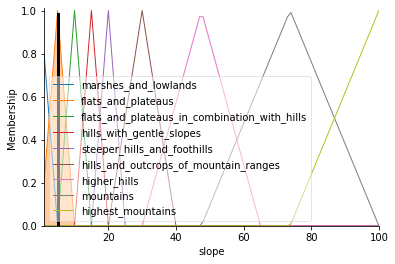

In [8]:
membership.slope.view(sim=engine.slope_simulation)

## Plot universe of slope

In [11]:
# x = land_use_type
# y = land_form_type

land_use_type = np.arange(0, 9.1, 1)
land_form_type = np.arange(0, 13.1, 1)
land_use_type, land_form_type = np.meshgrid(land_use_type, land_form_type)
pred_val: np.ndarray = np.zeros(shape=(len(land_form_type), len(land_form_type[1])))

for i in range(1, len(land_use_type[1])):
    for j in range(1, len(land_form_type)):
        simulate = Prototype(land_use=i, land_form=j)
        pred_val[j][i] = simulate.slope_result

fig = go.Figure(data=[go.Surface(x=land_use_type, y=land_form_type, z=pred_val,
    contours = {
        "z": {"show": True, "start": 0, "end": 100, "size": 5, "color":"grey"}
    },
    # colorscale=[[0, 'rgb(100,0,255)'], [1, 'rgb(255,0,0)']],
    )])
fig.update_layout(title='Slope evaluation using the fuzzy logic model',
                  scene=dict(
                      xaxis_title='Land use [‰]',
                      yaxis_title='Land form [m/s]',
                      zaxis_title='Slope evaluation'),
                  autosize=True,
                  width=900, height=900,)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
fig.show()

## Plot universe of impervious

In [12]:
# x = land_use_type
# y = land_form_type

land_use_type = np.arange(0, 10.1, 1)
land_form_type = np.arange(0, 14.1, 1)
land_use_type, land_form_type = np.meshgrid(land_use_type, land_form_type)
pred_val: np.ndarray = np.zeros(shape=(len(land_form_type), len(land_form_type[1])))

for i in range(1, len(land_use_type[1])):
    for j in range(1, len(land_form_type)):
        simulate = Prototype(land_use=i, land_form=j)
        pred_val[j][i] = simulate.impervious_result

fig = go.Figure(data=[go.Surface(x=land_use_type, y=land_form_type, z=pred_val,
    contours = {
        "z": {"show": True, "start": 0, "end": 100, "size": 5, "color":"grey"}
    },
    # colorscale=[[0, 'rgb(100,0,255)'], [1, 'rgb(255,0,0)']],
    )])
fig.update_layout(title='Impervious evaluation using the fuzzy logic model',
                  scene=dict(
                      xaxis_title='Land use [‰]',
                      yaxis_title='Land form [m/s]',
                      zaxis_title='Impervious evaluation'),
                  autosize=True,
                  width=900, height=900,)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
fig.show()

# Get category of catchment

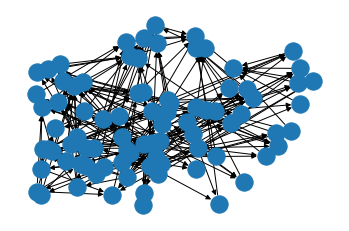

In [13]:
slope_ctr = engine.slope_simulation_ctrl.view()

AttributeError: ignored

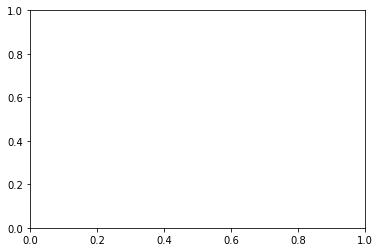

In [18]:
slope_rules = SlopeRule()
rule_1 = slope_rules.rule1.view_n()